# Importing models from scikit-learn

Concrete ML provides a `from_sklearn_model` to import an already trained model to FHE.
This feature is implemented for two types of models, linear models and tree based models.

In [1]:
from functools import partial

# The simulation mode allows to measure the impact of FHE execution on accuracy
# without paying the cost of FHE computations.
# However, data is not encrypted when using the simulation: the model performs inference
# on clear data.


def make_classifier_comparison_from_sklearn(*args, **kwargs):
    return args, kwargs


%run utils/classifier_comparison_utils.py

In [2]:
from concrete.ml.sklearn import (
    DecisionTreeClassifier,
    LinearSVC,
    LogisticRegression,
    RandomForestClassifier,
    XGBClassifier,
)

## Linear models

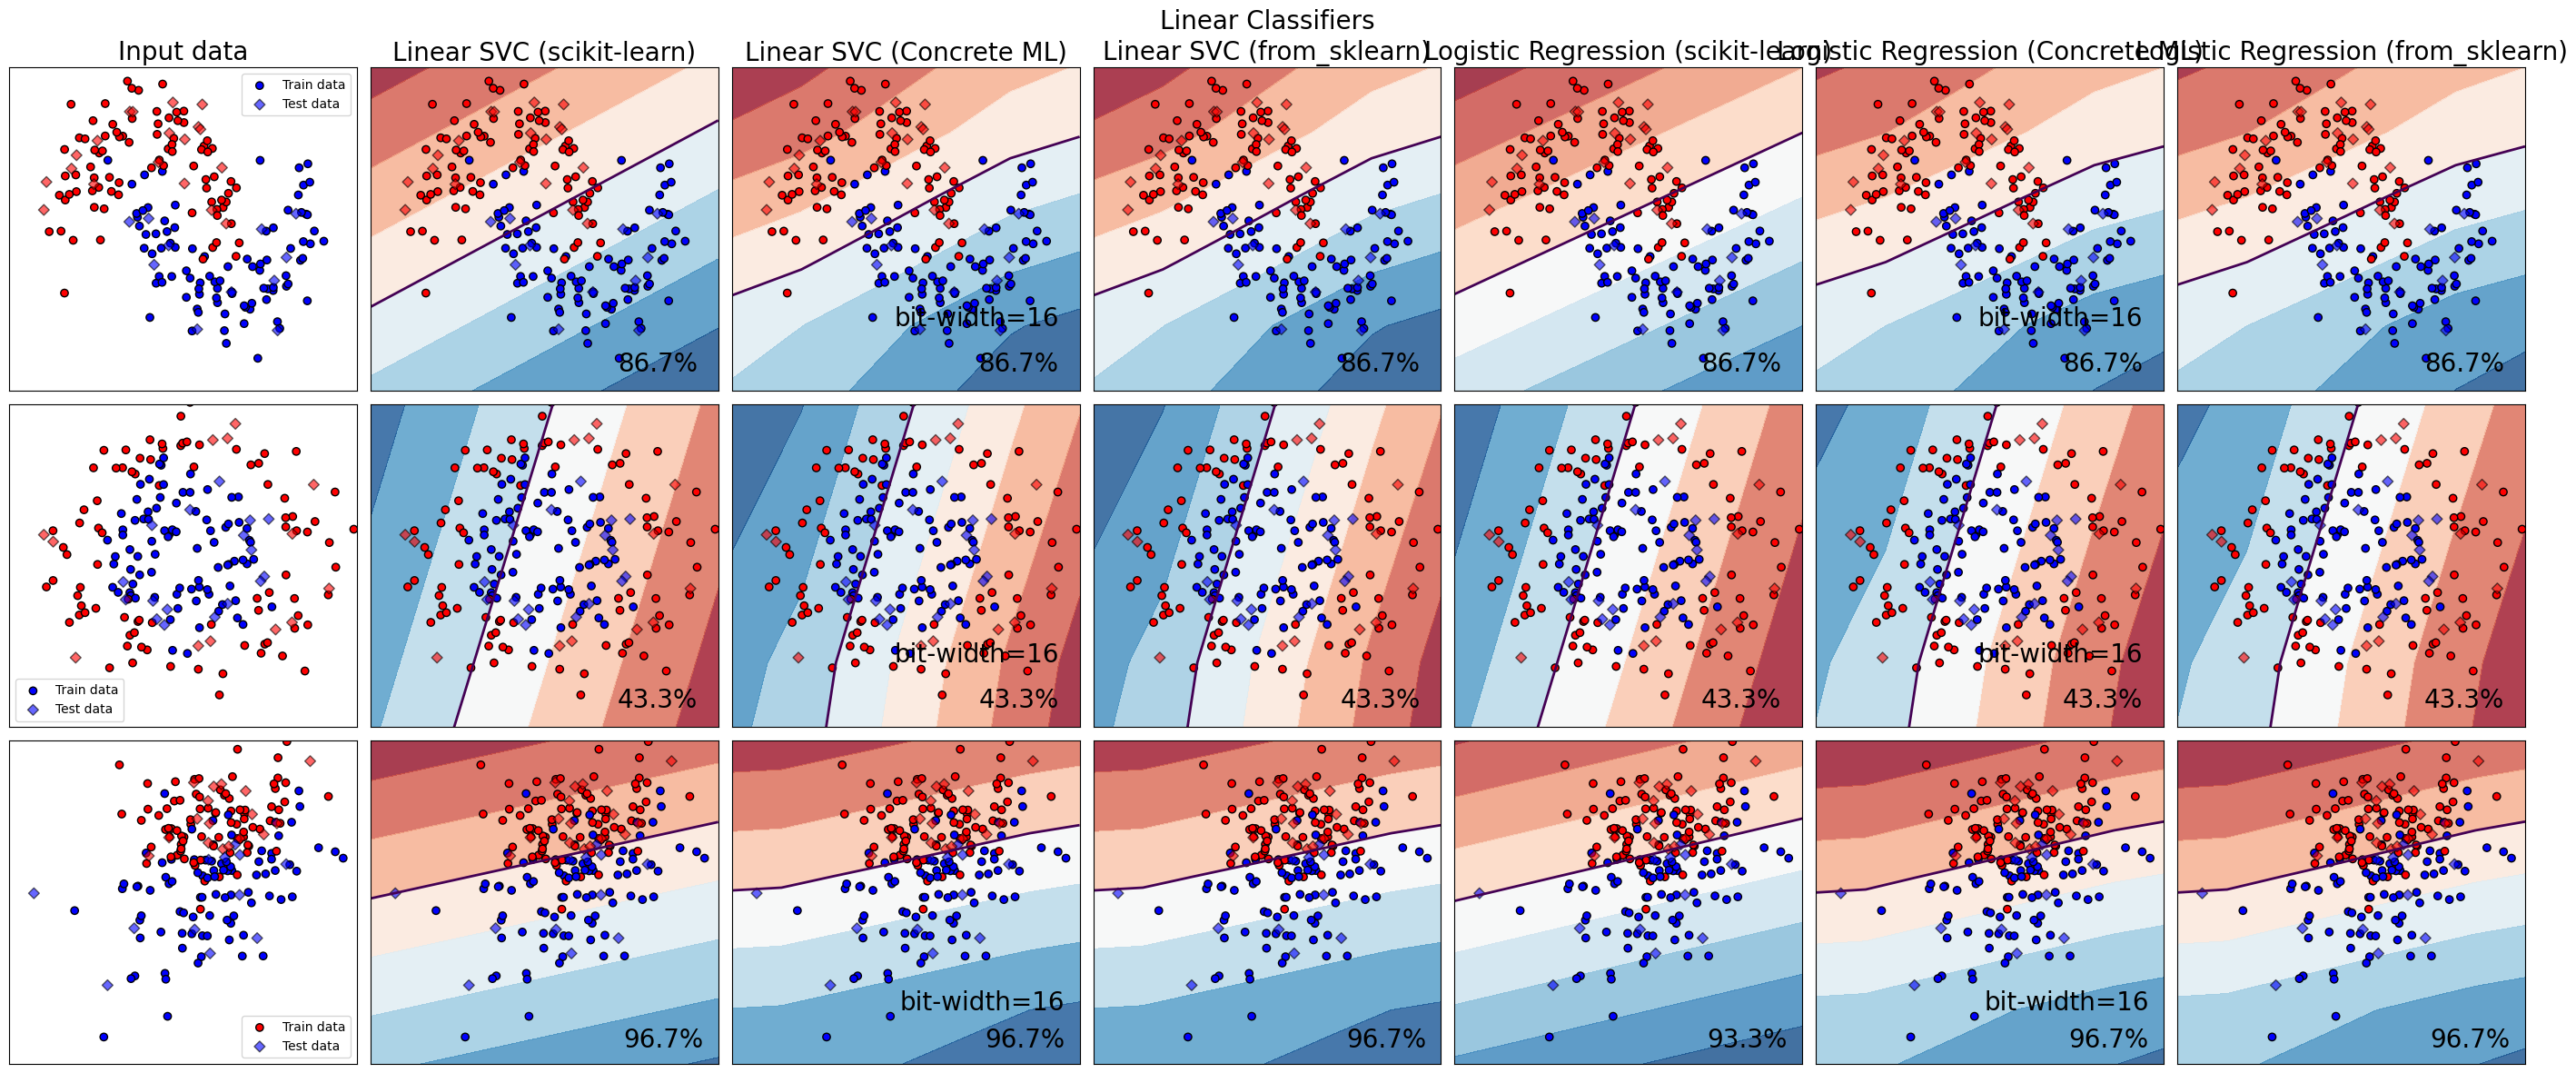

CPU times: user 8.75 s, sys: 5.62 s, total: 14.4 s
Wall time: 6.09 s


In [3]:
%%time

linear_classifiers = [
    (partial(LinearSVC, C=0.025), "Linear SVC"),
    (LogisticRegression, "Logistic Regression"),
]

# pylint: disable-next=undefined-variable
make_classifier_comparison_from_sklearn(
    "Linear Classifiers", linear_classifiers, 0, simulate=True, h=1
)  # noqa

## Tree-based-models

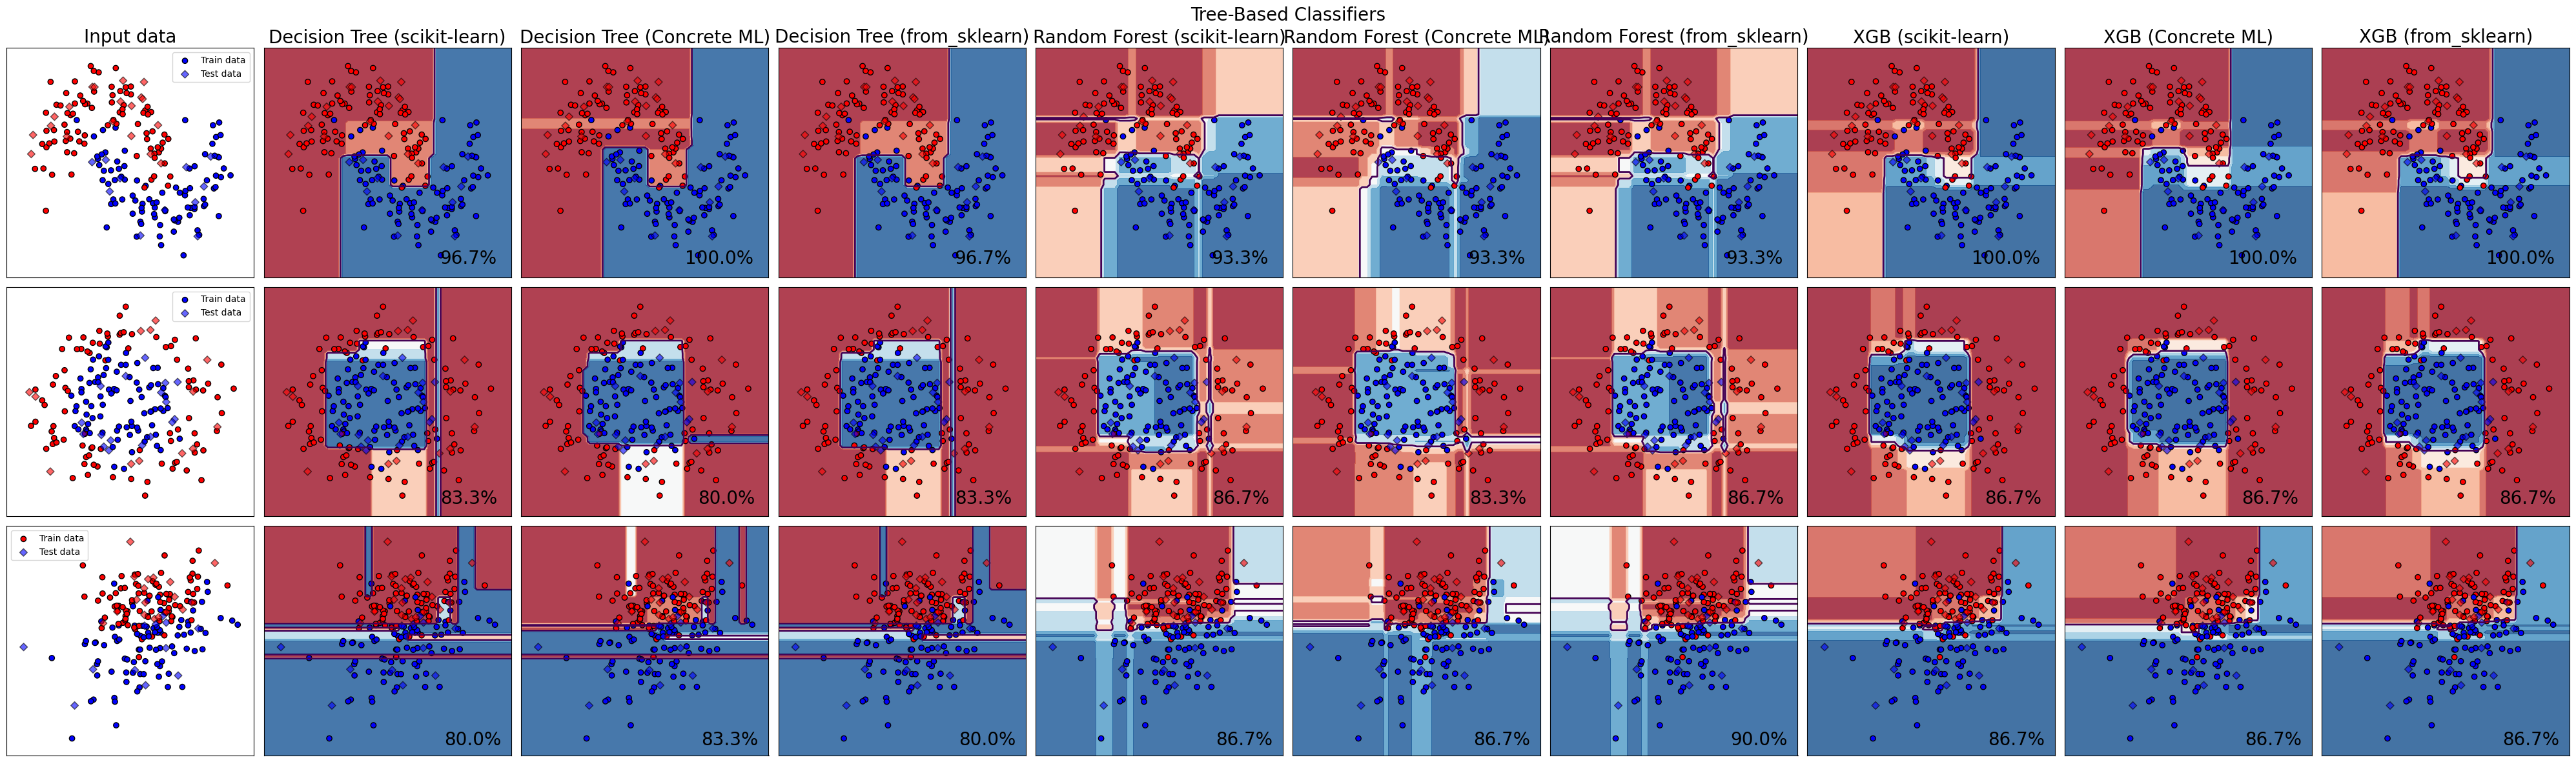

CPU times: user 1d 3h 34min 43s, sys: 52min 17s, total: 1d 4h 27min
Wall time: 14min 11s


In [4]:
%%time

tree_classifiers = [
    (partial(DecisionTreeClassifier, max_depth=5), "Decision Tree"),
    (partial(RandomForestClassifier, max_depth=4, n_estimators=5), "Random Forest"),
    (partial(XGBClassifier, n_jobs=1, max_depth=4, n_estimators=5), "XGB"),
]

# pylint: disable-next=undefined-variable
make_classifier_comparison_from_sklearn(  # noqa
    "Tree-Based Classifiers", tree_classifiers, 0.5, simulate=True, h=0.1
)